In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from keras.layers.normalization import BatchNormalization
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ReduceLROnPlateau

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

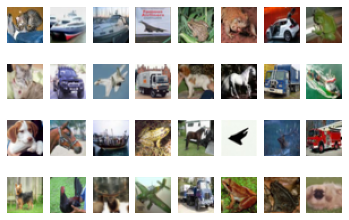

In [4]:
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.axis('off')
  plt.imshow(x_test[i])

In [5]:
#image normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.3,shuffle=True)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3), (35000, 1), (15000, 1))

In [7]:
def alexNet(input_img):
  #1st Convolutional Layer
  model = Conv2D(96,(11,11), strides=(4,4), padding='same')(input_img)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)
  model = MaxPooling2D((2,2), strides=(2,2), padding='same')(model)

  #2nd Convolutional Layer
  model = Conv2D(256,(5, 5), strides=(1,1), padding='same')(model)
  modle = BatchNormalization()(model)
  model = Activation('relu')(model)
  model = MaxPooling2D((2,2), strides=(2,2), padding='same')(model)

  #3rd Convolutional Layer
  model = Conv2D(384,(3,3), strides=(1,1), padding='same')(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)

  #4th Convolutional Layer
  model = Conv2D(384,(3,3), strides=(1,1), padding='same')(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)

  #5th Convolutional Layer
  model = Conv2D(256,(3,3), strides=(1,1), padding='same')(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)
  model = MaxPooling2D((2,2), strides=(2,2), padding='same')(model)

  #Passing it to a Fully Connected layer
  model = Flatten()(model)

  # 1st Fully Connected Layer
  model = Dense(4096, input_shape=(32,32,3,))(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)
  model = Dropout(0.4)(model)

  #2nd Fully Connected Layer
  model = Dense(4096)(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)
  model = Dropout(0.4)(model)

  #3rd Fully Connected Layer
  model = Dense(1000)(model)
  model = BatchNormalization()(model)
  model = Activation('relu')(model)
  model = Dropout(0.4)(model)

  #Output Layer
  model = Dense(10)(model)
  model = BatchNormalization()(model)
  model = Activation('softmax')(model)
  model = tf.keras.Model(inputs=input_img, outputs= model)
  return model

In [8]:
input_img = Input(shape = (32,32,3))
model = alexNet(input_img)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0     

In [9]:
adam = Adam(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer = adam ,metrics=['accuracy'])

In [10]:
# Exponential annealing
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.2, min_lr=0.0001)

In [11]:
history = model.fit(X_train,Y_train, batch_size=128,epochs=10,validation_data=(X_val, Y_val),callbacks=[reduce_lr])

Epoch 1/10
274/274 [==============================] - 601s 2s/step - loss: 2.0927 - accuracy: 0.2118 - val_loss: 3.5516 - val_accuracy: 0.1227
Epoch 2/10
274/274 [==============================] - 605s 2s/step - loss: 1.6467 - accuracy: 0.3758 - val_loss: 2.2618 - val_accuracy: 0.3021
Epoch 3/10
274/274 [==============================] - 605s 2s/step - loss: 1.4520 - accuracy: 0.4570 - val_loss: 1.7593 - val_accuracy: 0.4009
Epoch 4/10
274/274 [==============================] - 608s 2s/step - loss: 1.3388 - accuracy: 0.5069 - val_loss: 1.8201 - val_accuracy: 0.3803
Epoch 5/10
274/274 [==============================] - 605s 2s/step - loss: 1.2075 - accuracy: 0.5587 - val_loss: 2.4934 - val_accuracy: 0.3455
Epoch 6/10
274/274 [==============================] - 595s 2s/step - loss: 1.1122 - accuracy: 0.6002 - val_loss: 1.7313 - val_accuracy: 0.4513
Epoch 7/10
274/274 [==============================] - 595s 2s/step - loss: 1.0115 - accuracy: 0.6356 - val_loss: 1.5732 - val_accuracy: 0.4873

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 23s 74ms/step - loss: 1.6677 - accuracy: 0.4982


[1.6676796674728394, 0.498199999332428]

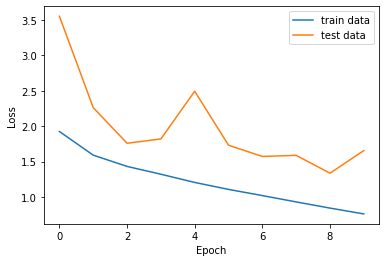

In [13]:
plt.plot(history.history['loss'], label='train data')
plt.plot(history.history['val_loss'], label='test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

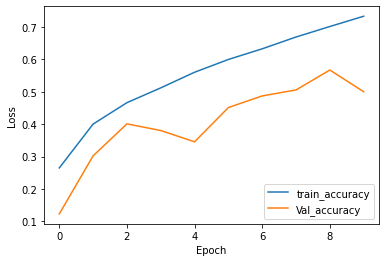

In [14]:
plt.plot(history.history['accuracy'] , label='train_accuracy')
plt.plot(history.history['val_accuracy'] , label='Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

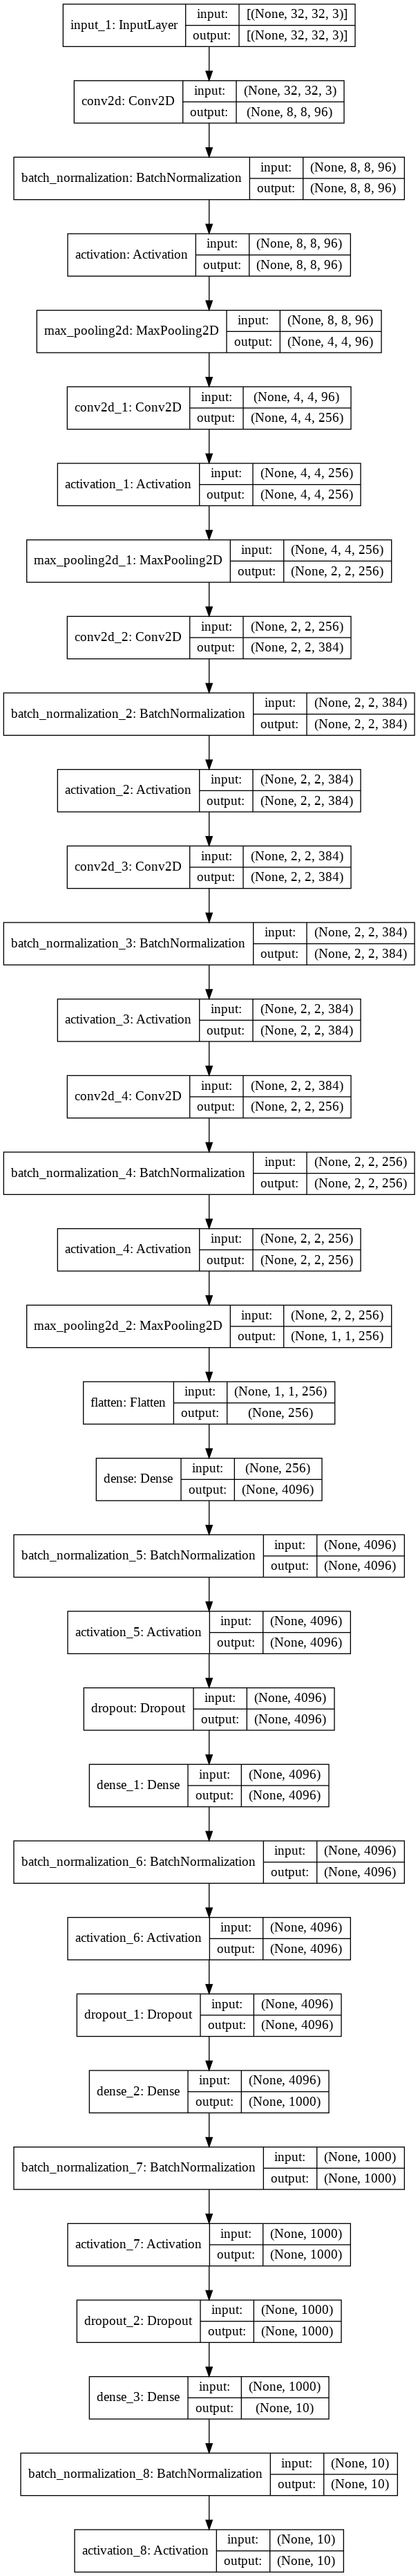

In [15]:
 tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)